In [1]:
# Google Colab only!! Install on server ocean-data-parser package
!pip install git+https://github.com/HakaiInstitute/ocean-data-parser.git    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/HakaiInstitute/ocean-data-parser.git to /tmp/pip-req-build-sz351z43
  Running command git clone -q https://github.com/HakaiInstitute/ocean-data-parser.git /tmp/pip-req-build-sz351z43
  Created wheel for ocean-data-parser: filename=ocean_data_parser-0.1.0-py3-none-any.whl size=41479 sha256=f43f9a671f87ae5976e34ce21ce54588d5c1d572e5abf18af68b038ff1e38aae
  Stored in directory: /tmp/pip-ephem-wheel-cache-h5tc7ehx/wheels/da/13/ab/3935dafef906d730e8b8408501739fcba46984c1d62b638d10
Successfully built ocean-data-parser


In [2]:
from ocean_data_parser.read import seabird
import requests

# Download test data 
Seabird test data is available here:

https://github.com/HakaiInstitute/ocean-data-parser/tree/main/tests/parsers_test_files/seabird

In [3]:
# url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
print('Download test cnv file')
url = "https://raw.githubusercontent.com/HakaiInstitute/ocean-data-parser/main/tests/parsers_test_files/seabird/1_datCnv_SBE19plus_01907674_2022_05_17_0002.cnv"
!wget --no-cache --backups=1 {url}
print('Download test btl file')
url = "https://raw.githubusercontent.com/HakaiInstitute/ocean-data-parser/main/tests/parsers_test_files/seabird/MI18MHDR.btl"
!wget --no-cache --backups=1 {url}

Download test cnv file
--2022-06-21 13:20:30--  https://raw.githubusercontent.com/HakaiInstitute/ocean-data-parser/main/tests/parsers_test_files/seabird/1_datCnv_SBE19plus_01907674_2022_05_17_0002.cnv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143036 (140K) [text/plain]
Failed to rename 1_datCnv_SBE19plus_01907674_2022_05_17_0002.cnv to 1_datCnv_SBE19plus_01907674_2022_05_17_0002.cnv.1: (2) No such file or directory
Saving to: ‘1_datCnv_SBE19plus_01907674_2022_05_17_0002.cnv’

1_datCnv_SBE19plus_ 100%[===================>] 139.68K  --.-KB/s    in 0.02s   

2022-06-21 13:20:30 (6.56 MB/s) - ‘1_datCnv_SBE19plus_01907674_2022_05_17_0002.cnv’ saved [143036/143036]

Download test btl file
--2022-06-21 13:20:30--  https://raw.githubusercontent.com/HakaiInstit

# Read CSV

In [5]:
ds_csv = seabird.cnv('/content/1_datCnv_SBE19plus_01907674_2022_05_17_0002.cnv')
ds_csv

<xarray.Dataset>
Dimensions:     (index: 894)
Coordinates:
  * index       (index) int64 0 1 2 3 4 5 6 7 ... 887 888 889 890 891 892 893
Data variables: (12/13)
    scan        (index) int64 241 242 243 244 245 ... 1130 1131 1132 1133 1134
    timeS       (index) float64 60.0 60.25 60.5 60.75 ... 282.8 283.0 283.2
    prdM        (index) float64 3.256 3.259 3.239 3.226 ... -0.238 -0.238 -0.245
    tv290C      (index) float64 10.51 10.51 10.52 10.52 ... 10.39 10.39 10.38
    c0mSPercm   (index) float64 31.62 31.69 31.71 31.7 ... 3.339 4.482 5.419
    sbeox0V     (index) float64 2.035 2.031 2.027 2.027 ... 2.458 2.446 2.435
    ...          ...
    seaTurbMtr  (index) float64 0.319 0.284 0.267 0.257 ... 0.0 0.0 0.0 0.0
    par         (index) float64 326.1 325.2 329.0 ... 2.836e+03 2.774e+03
    dzPerdtM    (index) float64 -5.39e-14 0.001 -0.004 ... 0.001 0.001 -0.001
    CStarTr0    (index) float64 91.15 90.04 90.04 90.04 ... 31.95 31.94 31.95
    CStarAt0    (index) float64 0.3706 0.4196 0.4195 ... 4.564 4.565 4.564
    flag        (index) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/21)
    instrument_type:                  SBE19plus 
    history:                          2022-05-18T09:00:11 - {'in': 'C:\\Users...
    filename:                         C:\Users\Quadra.Lab\Desktop\ctd files\2...
    software_version:                 2.8.0.119
    temperature_sn:                   7674
    conductivity_sn:                  7674
    ...                               ...
    instrument_xml:                   {'Sensors': {'@count': '9', 'sensor': [...
    datcnv_date:                      May 18 2022 09:00:11, 7.26.1.8 [datcnv_...
    datcnv_in:                        C:\Users\Hakai\AppData\Local\Temp\sbe19...
    datcnv_skipover:                  240
    datcnv_ox_hysteresis_correction:  no
    file_type:                        ascii

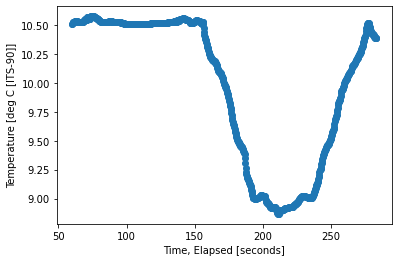

In [6]:
ds_csv.plot.scatter(x='timeS',y='tv290C')

# Parse Bottle data

In [7]:
ds_btl = seabird.btl('/content/MI18MHDR.btl')

Unknown line format: * Latitude/Longitude added to scan

Unknown line format: * advance primary conductivity  0.073 seconds

Unknown line format: * advance secondary conductivity  0.073 seconds

Unknown line format: * advance voltage 7  0.000 seconds

Unknown line format: * delete word 3 from scan

Unknown line format: * delete word 4 from scan

Variable date is missing from vocabulary dictionary
Variable cStarTr0 is missing from vocabulary dictionary


In [8]:
ds_btl

<xarray.Dataset>
Dimensions:            (bottle: 12)
Coordinates:
  * bottle             (bottle) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/37)
    prDM               (bottle) float64 137.5 98.48 69.5 ... 8.6 1.975 1.821
    depFM              (bottle) float64 140.2 100.4 70.87 ... 8.77 2.014 1.857
    t090C              (bottle) float64 4.094 4.518 4.886 ... 16.07 16.57 16.56
    c0uSPercm          (bottle) float64 176.1 178.0 179.8 ... 240.9 243.9 243.9
    specc              (bottle) float64 302.6 301.6 300.8 ... 293.2 293.3 293.3
    wetStar            (bottle) float64 0.1716 0.2711 0.8172 ... 0.1654 0.1794
    ...                 ...
    timeS_sdev         (bottle) float64 0.595 0.595 0.595 ... 0.595 0.595 0.595
    altM_sdev          (bottle) float64 0.13 0.0 0.0 0.0 ... 39.3 0.21 0.0 0.0
    latitude_sdev      (bottle) float64 1e-05 0.0 0.0 0.0 ... 1e-05 0.0 0.0 0.0
    longitude_sdev     (bottle) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    scan_sdev          (bottle) int64 14 14 14 14 14 14 14 14 14 14 14 14
    time               (bottle) datetime64[ns] 2016-06-23T19:04:57 ... 2016-0...
Attributes: (12/33)
    instrument_type:                            SBE 911plus V 5.0
    history:                                    Latitude/Longitude added to s...
    filename:                                   C:\Users\Tech\Desktop\Seasave...
    software_version:                           Seasave V 7.23.2
    temperature_sn:                             5553
    conductivity_sn:                            2728
    ...                                         ...
    datcnv_ox_tau_correction:                   yes
    datcnv_bottle_scan_range_source:            scans marked with bottle conf...
    datcnv_scans_per_bottle:                    49
    bottlesum_date:                             Jun 24 2016 13:02:07, 7.23.2
    bottlesum_in:                               C:\Users\Tech\Desktop\Seasave...
    bottle_columns:                             ['Bottle', 'Date', 'PrDM', 'D...

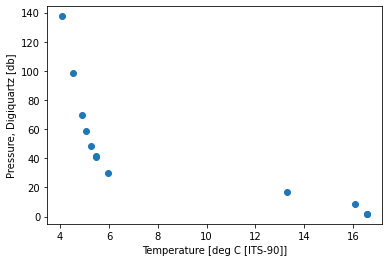

In [11]:
ds_btl.plot.scatter(x='t090C',y='prDM')